# Stellar Object Classification

Importing Libraries

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
star_data = pd.read_csv("star_classification.csv")

In [3]:
star_data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
star_data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [5]:
star_data.shape

(100000, 18)

In [6]:
star_data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [7]:
star_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Checking Missing Values and Handling them

In [8]:
star_data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

As the ID columns are the unique values for the dataset we are checking the values and dreoping form the dataset

In [9]:
columns = ['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID']

# Loop through the column names and calculate unique values for each
for col in columns:
    unique_count = star_data[col].nunique()
    print(f"The unique values in {col} are {unique_count}")

The unique values in obj_ID are 78053
The unique values in run_ID are 430
The unique values in rerun_ID are 1
The unique values in field_ID are 856
The unique values in spec_obj_ID are 100000
The unique values in fiber_ID are 1000


As we see the above values obj_ID, Spec_obj_ID have many unique values and the rerun has only one for all the records. So, we will remove all the ID values that will not be used to identify the celestial object.

In [10]:
star_data.drop(columns= columns, axis= 1, inplace= True)

In [11]:
star_data.head()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,6121,56187


In [12]:
star_data.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'class',
       'redshift', 'plate', 'MJD'],
      dtype='object')

Exploratory Data Analysis (EDA)

In [13]:
data = star_data.drop(columns='class', axis= 1)
data.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,0.116123,6121,56187


In [14]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [15]:
data

array([[0.37690482, 0.50380246, 0.99911256, ..., 0.09183086, 0.45159189,
        0.64800655],
       [0.40228576, 0.49181212, 0.99920216, ..., 0.11238889, 0.8288413 ,
        0.89432004],
       [0.39495978, 0.53413882, 0.99925055, ..., 0.09316979, 0.35094862,
        0.54396505],
       ...,
       [0.62384846, 0.33880973, 0.99884246, ..., 0.02183899, 0.20340363,
        0.399645  ],
       [0.58962907, 0.6429744 , 0.99925925, ..., 0.06622931, 0.52805146,
        0.64991808],
       [0.54692681, 0.67052516, 0.99898725, ..., 0.07874916, 0.58171159,
        0.75040961]])

In [16]:
data = pd.DataFrame(data= data, columns= ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 
       'redshift', 'plate', 'MJD'])

In [17]:
data.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.2,0.091831,0.451592,0.648007
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.8,0.112389,0.828841,0.894320
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.2,0.093170,0.350949,0.543965
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.4,0.134210,0.723312,0.878072
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.4,0.017959,0.476753,0.625205


In [18]:
data['class'] = star_data['class']

In [19]:
data.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD,class
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.2,0.091831,0.451592,0.648007,GALAXY
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.8,0.112389,0.828841,0.894320,GALAXY
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.2,0.093170,0.350949,0.543965,GALAXY
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.4,0.134210,0.723312,0.878072,GALAXY
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.4,0.017959,0.476753,0.625205,GALAXY


Checking Distribution of the target variable 'class' before analysis

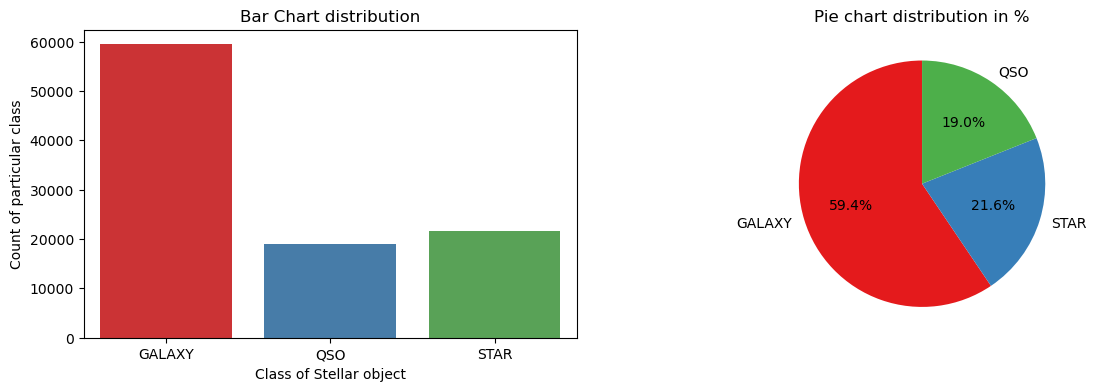

In [20]:
plt.figure(figsize= (14,4))

plt.subplot(1,2,1)
palette_colors = sns.color_palette("Set1")
ax = sns.countplot(data= data, x= 'class', palette= palette_colors)
plt.xlabel("Class of Stellar object")
plt.ylabel("Count of particular class")
plt.title("Bar Chart distribution")


plt.subplot(1,2,2)
distribution = data['class'].value_counts()
plt.pie(x=distribution, labels= distribution.index, autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('Set1') )
plt.title("Pie chart distribution in %")
plt.show()

We have an imbalanced data target distribution.

# Encoding the class variable

We will be changing the 'class' variable values to number in the dataset using encoding

In [21]:
data['class'] = data['class'].map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})
data.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD,class
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.2,0.091831,0.451592,0.648007,0
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.8,0.112389,0.828841,0.894320,0
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.2,0.093170,0.350949,0.543965,0
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.4,0.134210,0.723312,0.878072,0
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.4,0.017959,0.476753,0.625205,0


## Outlier Analysis

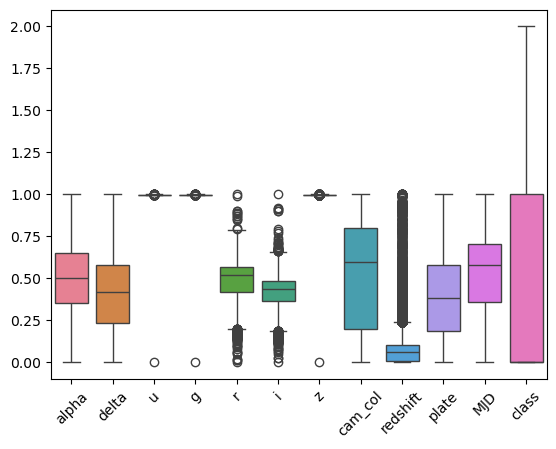

In [22]:
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

From the above plot we can see there are ouliers in the columns 'u', 'g', 'r', 'i', 'z', and more in 'red shift'. Let us try to remove them.

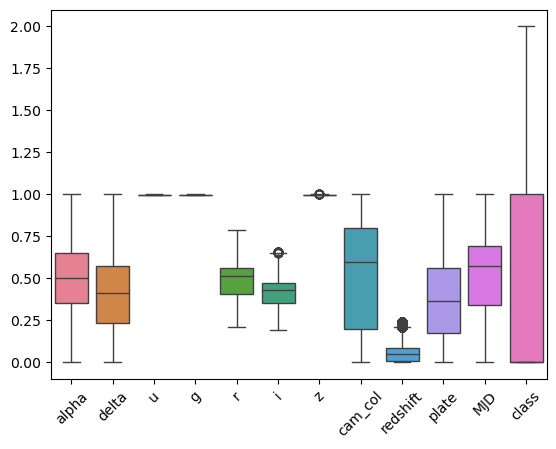

In [23]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter out the outliers
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    return filtered_df

# Create a copy of the data
data_clean = data.copy()

# Remove outliers for each numeric column
for col in data_clean.select_dtypes(include='number').columns:
    data_clean = remove_outliers(data_clean, col)

# Plot the boxplot with outliers removed
sns.boxplot(data=data_clean)
plt.xticks(rotation=45)
plt.show()

In [24]:
# Let us now check the percent of ouliers compared to data with outlier
removed_percent = ((data.shape[0] - data_clean.shape[0]) / data.shape[0]) * 100
print(f'Pencentage of outliers removed from the data set is {removed_percent}%')

Pencentage of outliers removed from the data set is 9.4%


# Univariate Analysis

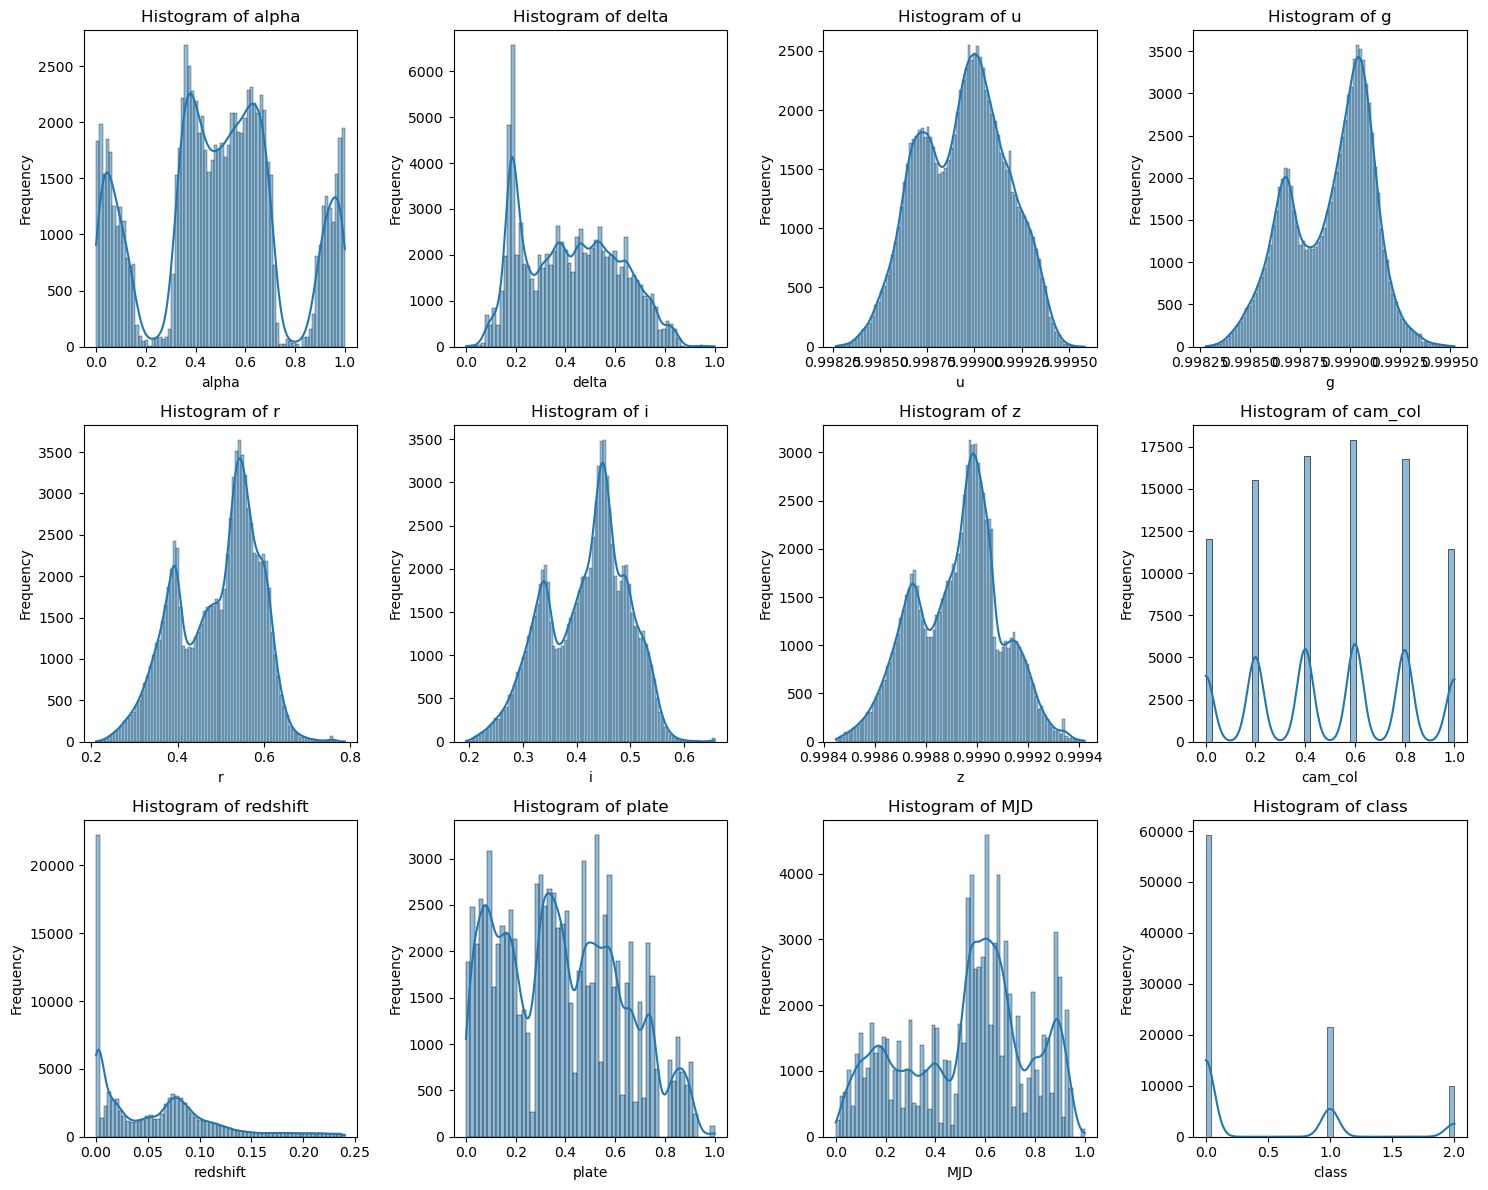

In [25]:
import math

# Select numeric columns from the dataset
numeric_columns = data_clean.select_dtypes(include='number').columns

# Calculate the number of rows needed based on the number of columns
n_cols = 4
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Set up the subplot grid with 3 columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))

# Flatten axes in case it's a 2D array
axes = axes.flatten()

# Create a histogram for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data_clean[col], ax=axes[i], kde=True)  # Plot with KDE curve
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots, if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
data_clean.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'redshift',
       'plate', 'MJD', 'class'],
      dtype='object')

In [27]:
columns1 = ['alpha', 'delta', 'u', 'g', 'r', 'class']
columns2 = ['i', 'z', 'cam_col', 'redshift', 'plate', 'MJD', 'class']

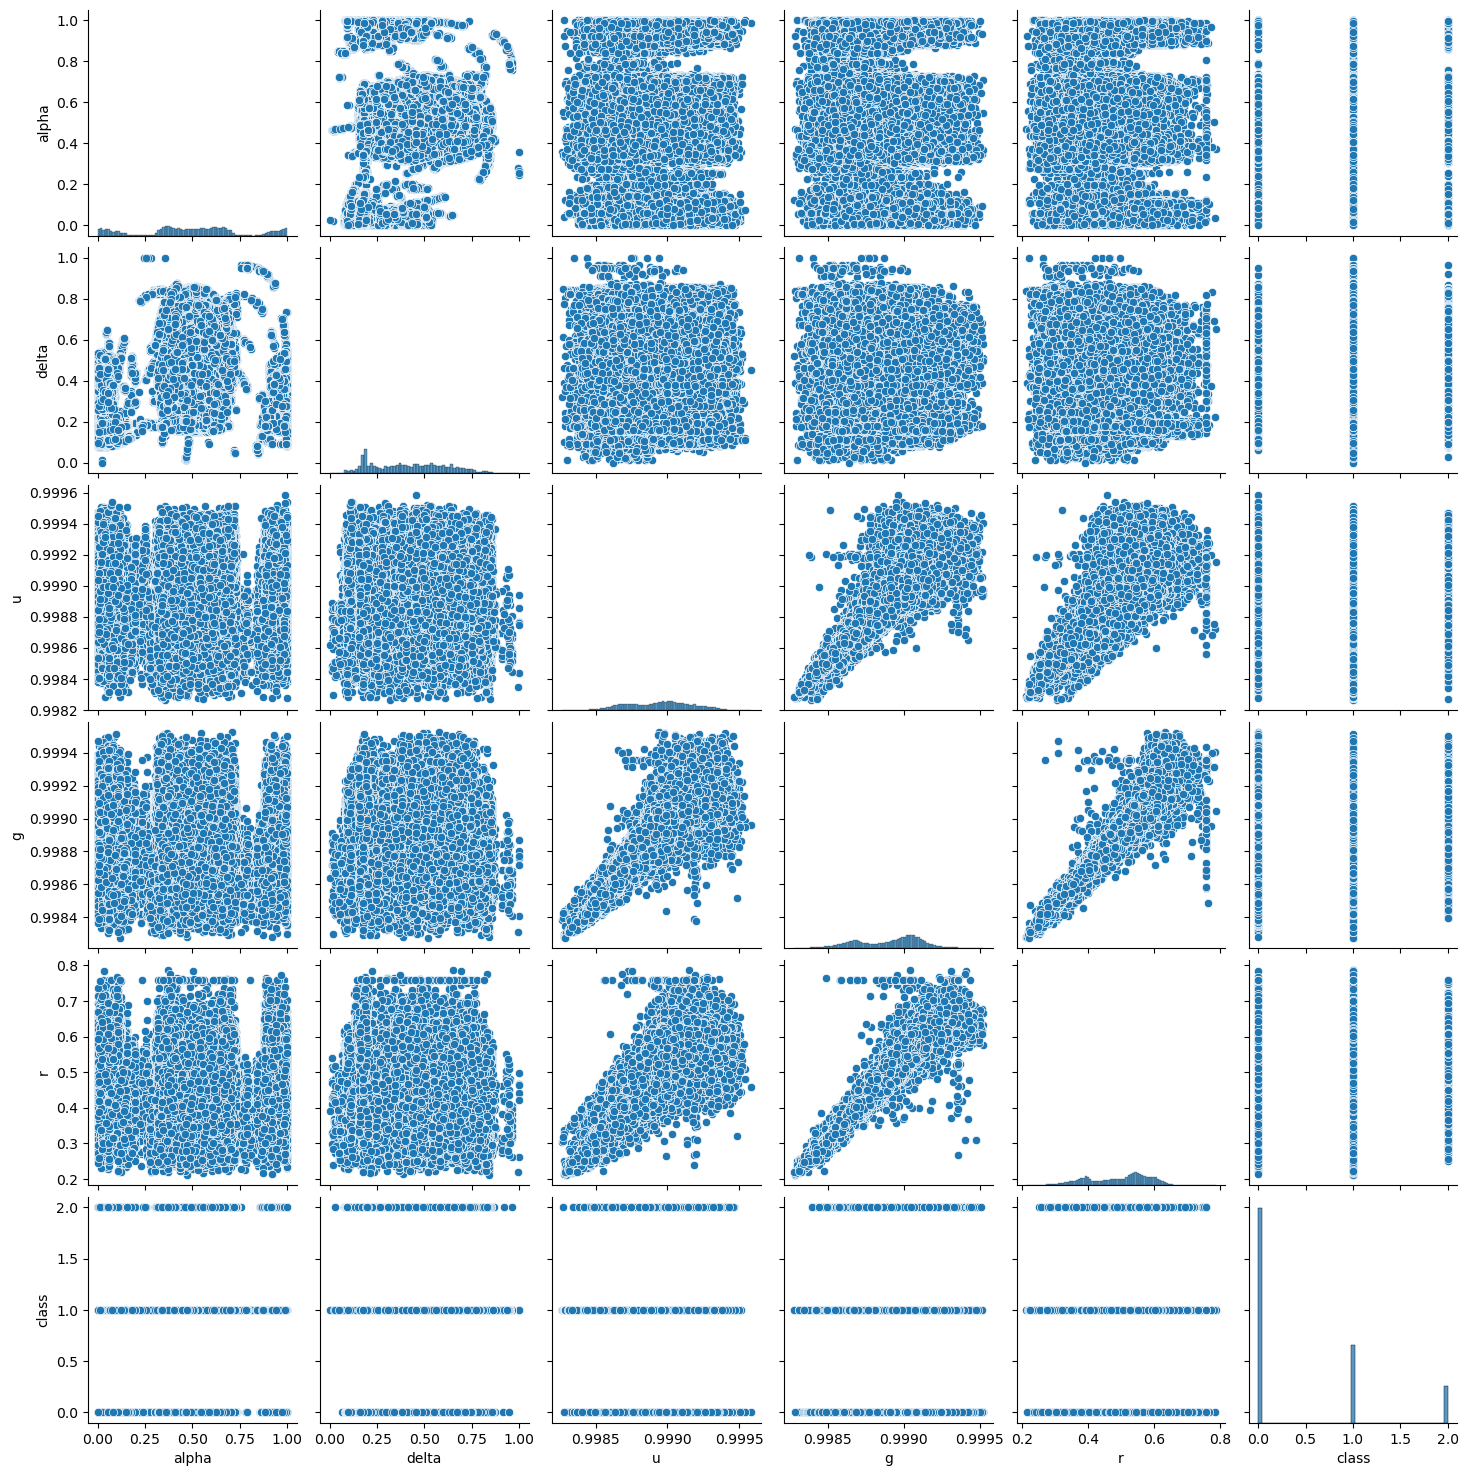

In [28]:
sns.pairplot(data=data_clean[columns1])
plt.show()

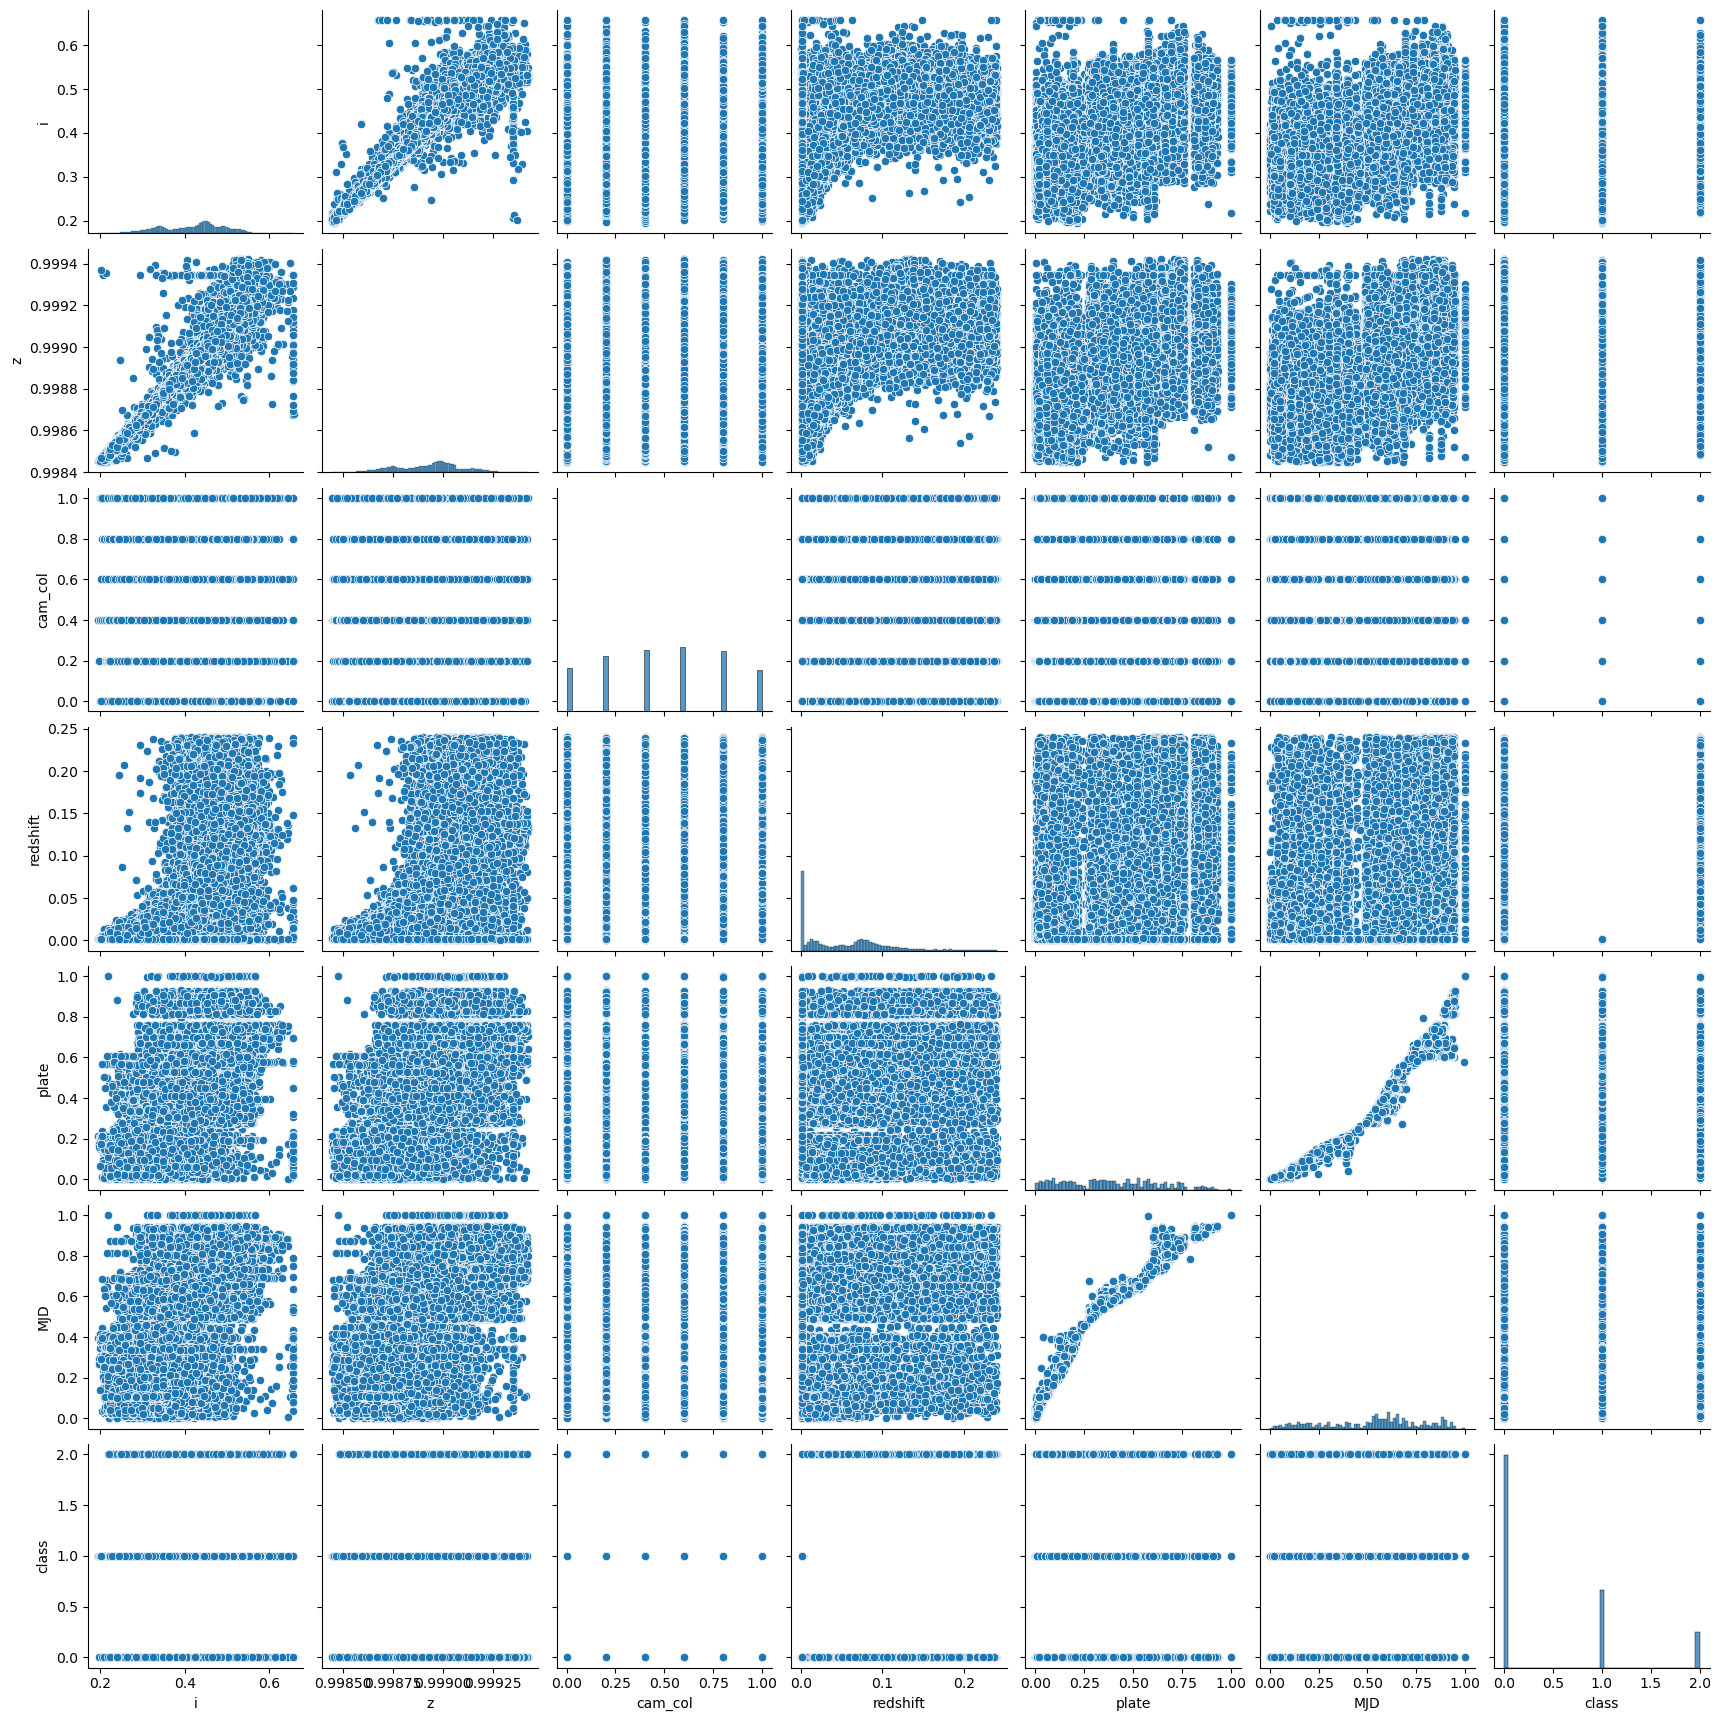

In [29]:
sns.pairplot(data=data_clean[columns2])
plt.show()

In [30]:
data_clean.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD,class
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.2,0.091831,0.451592,0.648007,0
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.8,0.112389,0.828841,0.894320,0
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.2,0.093170,0.350949,0.543965,0
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.4,0.134210,0.723312,0.878072,0
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.4,0.017959,0.476753,0.625205,0


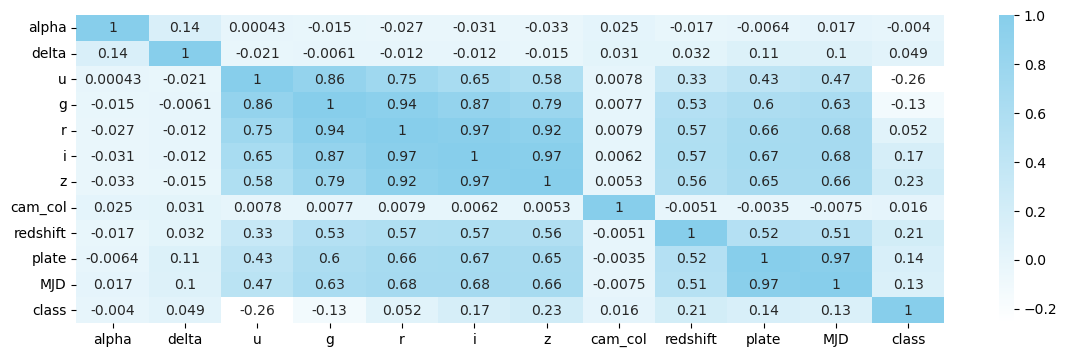

In [31]:
from matplotlib.colors import LinearSegmentedColormap

correl = data_clean.corr()

plt.figure(figsize= (14,4))

# Define a custom single-color colormap
single_color_cmap = LinearSegmentedColormap.from_list("single_color", ["white", "skyblue"])

# Plot the heatmap with the custom colormap
sns.heatmap(correl, cmap=single_color_cmap, annot=True)
plt.show()

# Splitting the Dataset

In [32]:
X = data_clean.drop('class', axis = 1)
y = data_clean['class']
X.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.2,0.091831,0.451592,0.648007
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.8,0.112389,0.828841,0.894320
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.2,0.093170,0.350949,0.543965
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.4,0.134210,0.723312,0.878072
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.4,0.017959,0.476753,0.625205


In [33]:
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    2
6    2
7    0
8    0
9    1
Name: class, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)
X_train.shape, y_train.shape

((67950, 11), (67950,))

# Model Development

### Decision Tree Classifier

In [35]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
y_pred_DT = model_DT.predict(X_test)

In [36]:
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT, average='weighted') # we are considering the average as weighted because of the class imbalance
recall_DT = recall_score(y_test, y_pred_DT, average='weighted')
confusion_DT = confusion_matrix(y_test, y_pred_DT)
classi_DT = classification_report(y_test, y_pred_DT)
print(f"The Accuracy score for Decision Tree Classifier is {accuracy_DT}")
print(f"The Precision score for Decision Tree Classifier is {precision_DT}")
print(f"The Recall score for Decision Tree Classifier is {recall_DT}")
print(f"The Confusion Matrix for Decision Tree Classifier is \n{confusion_DT}")
print(f"The Classification Report for Decision Tree Classifier is \n{classi_DT}")

The Accuracy score for Decision Tree Classifier is 0.9588962472406181
The Precision score for Decision Tree Classifier is 0.9590398293731635
The Recall score for Decision Tree Classifier is 0.9588962472406181
The Confusion Matrix for Decision Tree Classifier is 
[[14393    52   432]
 [   40  5225     0]
 [  406     1  2101]]
The Classification Report for Decision Tree Classifier is 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14877
           1       0.99      0.99      0.99      5265
           2       0.83      0.84      0.83      2508

    accuracy                           0.96     22650
   macro avg       0.93      0.93      0.93     22650
weighted avg       0.96      0.96      0.96     22650



### Random Forest Classifier

In [37]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)
y_pred_RF = model_DT.predict(X_test)

In [38]:
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF, average='weighted') # we are considering the average as weighted because of the class imbalance
recall_RF = recall_score(y_test, y_pred_RF, average='weighted')
confusion_RF = confusion_matrix(y_test, y_pred_RF)
classi_RF = classification_report(y_test, y_pred_RF)
print(f"The Accuracy score for Random Forest Classifier is {accuracy_RF}")
print(f"The Precision score for Random Forest  Classifier is {precision_RF}")
print(f"The Recall score for Random Forest  Classifier is {recall_RF}")
print(f"The Confusion Matrix for Random Forest  Classifier is \n{confusion_RF}")
print(f"The Classification Report for Random Forest  Classifier is \n{classi_RF}")

The Accuracy score for Random Forest Classifier is 0.9588962472406181
The Precision score for Random Forest  Classifier is 0.9590398293731635
The Recall score for Random Forest  Classifier is 0.9588962472406181
The Confusion Matrix for Random Forest  Classifier is 
[[14393    52   432]
 [   40  5225     0]
 [  406     1  2101]]
The Classification Report for Random Forest  Classifier is 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14877
           1       0.99      0.99      0.99      5265
           2       0.83      0.84      0.83      2508

    accuracy                           0.96     22650
   macro avg       0.93      0.93      0.93     22650
weighted avg       0.96      0.96      0.96     22650



### K Nearest Neighbours Classifier

In [39]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [40]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted') # we are considering the average as weighted because of the class imbalance
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
confusion_knn = confusion_matrix(y_test, y_pred_knn)
classi_knn = classification_report(y_test, y_pred_knn)
print(f"The Accuracy score for K Nearest Neighbours Classifier is {accuracy_knn}")
print(f"The Precision score for K Nearest Neighbours  Classifier is {precision_knn}")
print(f"The Recall score for K Nearest Neighbours  Classifier is {recall_knn}")
print(f"The Confusion Matrix for K Nearest Neighbours  Classifier is \n{confusion_knn}")
print(f"The Classification Report for K Nearest Neighbours  Classifier is \n{classi_knn}")

The Accuracy score for K Nearest Neighbours Classifier is 0.8977924944812362
The Precision score for K Nearest Neighbours  Classifier is 0.898565372737319
The Recall score for K Nearest Neighbours  Classifier is 0.8977924944812362
The Confusion Matrix for K Nearest Neighbours  Classifier is 
[[14274   460   143]
 [  859  4404     2]
 [  806    45  1657]]
The Classification Report for K Nearest Neighbours  Classifier is 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     14877
           1       0.90      0.84      0.87      5265
           2       0.92      0.66      0.77      2508

    accuracy                           0.90     22650
   macro avg       0.90      0.82      0.85     22650
weighted avg       0.90      0.90      0.89     22650



### Support Vector Machine Classifier

In [50]:
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

In [51]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted') # we are considering the average as weighted because of the class imbalance
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
confusion_svc = confusion_matrix(y_test, y_pred_svc)
classi_svc = classification_report(y_test, y_pred_svc)
print(f"The Accuracy score for Support Vector Machine Classifier is {accuracy_svc}")
print(f"The Precision score for Support Vector Machine Classifier is {precision_svc}")
print(f"The Recall score for Support Vector Machine Classifier is {recall_svc}")
print(f"The Confusion Matrix for Support Vector Machine Classifier is \n{confusion_svc}")
print(f"The Classification Report for Support Vector Machine Classifier is \n{classi_svc}")

The Accuracy score for Support Vector Machine Classifier is 0.931346578366446
The Precision score for Support Vector Machine Classifier is 0.9311228156064808
The Recall score for Support Vector Machine Classifier is 0.931346578366446
The Confusion Matrix for Support Vector Machine Classifier is 
[[14193   506   178]
 [  163  5102     0]
 [  697    11  1800]]
The Classification Report for Support Vector Machine Classifier is 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14877
           1       0.91      0.97      0.94      5265
           2       0.91      0.72      0.80      2508

    accuracy                           0.93     22650
   macro avg       0.92      0.88      0.90     22650
weighted avg       0.93      0.93      0.93     22650



### Gradient Boosting Classifier

In [44]:
model_gb = GradientBoostingClassifier(n_estimators=100, loss='log_loss', random_state=100)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

In [45]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted') # we are considering the average as weighted because of the class imbalance
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
confusion_gb = confusion_matrix(y_test, y_pred_gb)
classi_gb = classification_report(y_test, y_pred_gb)
print(f"The Accuracy score for Gradient Boosting Classifier is {accuracy_gb}")
print(f"The Precision score for Gradient Boosting Classifier is {precision_gb}")
print(f"The Recall score for Gradient Boosting Classifier is {recall_gb}")
print(f"The Confusion Matrix for Gradient Boosting Classifier is \n{confusion_gb}")
print(f"The Classification Report for Gradient Boosting Classifier is \n{classi_gb}")

The Accuracy score for Gradient Boosting Classifier is 0.968167770419426
The Precision score for Gradient Boosting Classifier is 0.9676206691087672
The Recall score for Gradient Boosting Classifier is 0.968167770419426
The Confusion Matrix for Gradient Boosting Classifier is 
[[14579   127   171]
 [    3  5262     0]
 [  419     1  2088]]
The Classification Report for Gradient Boosting Classifier is 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     14877
           1       0.98      1.00      0.99      5265
           2       0.92      0.83      0.88      2508

    accuracy                           0.97     22650
   macro avg       0.96      0.94      0.95     22650
weighted avg       0.97      0.97      0.97     22650



### AdaBoosting Classifier

In [46]:
weaker_learner = DecisionTreeClassifier(max_depth= 1)
model_ab = AdaBoostClassifier(estimator= weaker_learner, n_estimators= 50, learning_rate= 1.0)
model_ab.fit(X_train, y_train)

y_pred_ab = model_ab.predict(X_test)

In [47]:
accuracy_ab = accuracy_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab, average='weighted') # we are considering the average as weighted because of the class imbalance
recall_ab = recall_score(y_test, y_pred_ab, average='weighted')
confusion_ab = confusion_matrix(y_test, y_pred_ab)
classi_ab = classification_report(y_test, y_pred_ab)
print(f"The Accuracy score for AdaBoosting Classifier is {accuracy_ab}")
print(f"The Precision score for AdaBoosting Classifier is {precision_ab}")
print(f"The Recall score for AdaBoosting Classifier is {recall_ab}")
print(f"The Confusion Matrix for AdaBoosting Classifier is \n{confusion_ab}")
print(f"The Classification Report for AdaBoosting Classifier is \n{classi_ab}")

The Accuracy score for AdaBoosting Classifier is 0.8526710816777042
The Precision score for AdaBoosting Classifier is 0.8012804030539856
The Recall score for AdaBoosting Classifier is 0.8526710816777042
The Confusion Matrix for AdaBoosting Classifier is 
[[13930   144   803]
 [    2  5263     0]
 [ 2387     1   120]]
The Classification Report for AdaBoosting Classifier is 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     14877
           1       0.97      1.00      0.99      5265
           2       0.13      0.05      0.07      2508

    accuracy                           0.85     22650
   macro avg       0.65      0.66      0.65     22650
weighted avg       0.80      0.85      0.82     22650



### XGBoost Classifier

In [48]:
# Initialize XGBoost Classifier
model_xgb = xgb.XGBClassifier()

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Assuming `y_pred_xgb` is the predicted values from the XGBoost model

# Accuracy score for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Precision score with 'weighted' average for multiclass classification
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')

# Recall score with 'weighted' average for multiclass classification
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

# Confusion matrix for XGBoost
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)

# Classification report for XGBoost (which includes precision, recall, f1-score for each class)
classi_xgb = classification_report(y_test, y_pred_xgb)

# Print the results
print(f"The Accuracy score for XGBoost Classifier is {accuracy_xgb}")
print(f"The Precision score for XGBoost Classifier is {precision_xgb}")
print(f"The Recall score for XGBoost Classifier is {recall_xgb}")
print(f"The Confusion Matrix for XGBoost Classifier is \n{confusion_xgb}")
print(f"The Classification Report for XGBoost Classifier is \n{classi_xgb}")

The Accuracy score for XGBoost Classifier is 0.9735099337748344
The Precision score for XGBoost Classifier is 0.9731059902098658
The Recall score for XGBoost Classifier is 0.9735099337748344
The Confusion Matrix for XGBoost Classifier is 
[[14641    41   195]
 [   19  5246     0]
 [  344     1  2163]]
The Classification Report for XGBoost Classifier is 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14877
           1       0.99      1.00      0.99      5265
           2       0.92      0.86      0.89      2508

    accuracy                           0.97     22650
   macro avg       0.96      0.95      0.95     22650
weighted avg       0.97      0.97      0.97     22650



### Model Comparision

In [56]:
#Creating a dataframe with all the models with respect to all evaluation metrics
Model_compare = pd.DataFrame({
    'Models': ['Desicion Tree', 'Random Forest', 'K Nearest Neigbhours', 'Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'XGBoost'],
    'Accuracy' : [accuracy_DT, accuracy_RF, accuracy_knn, accuracy_svc, accuracy_gb, accuracy_ab, accuracy_xgb],
    'Precision' : [precision_DT, precision_RF, precision_knn, precision_svc, precision_gb, precision_ab, precision_xgb],
    'Recall' : [recall_DT, recall_RF, recall_knn, recall_svc, recall_gb, recall_ab, recall_xgb]
})

#Displaying the dataframe
Model_compare.head(7)

,Models,Accuracy,Precision,Recall
0,Desicion Tree,0.958896,0.959040,0.958896
1,Random Forest,0.958896,0.959040,0.958896
2,K Nearest Neigbhours,0.897792,0.898565,0.897792
3,Support Vector Machines,0.931347,0.931123,0.931347
4,Gradient Boosting,0.968168,0.967621,0.968168
5,AdaBoost,0.852671,0.801280,0.852671
6,XGBoost,0.973510,0.973106,0.973510


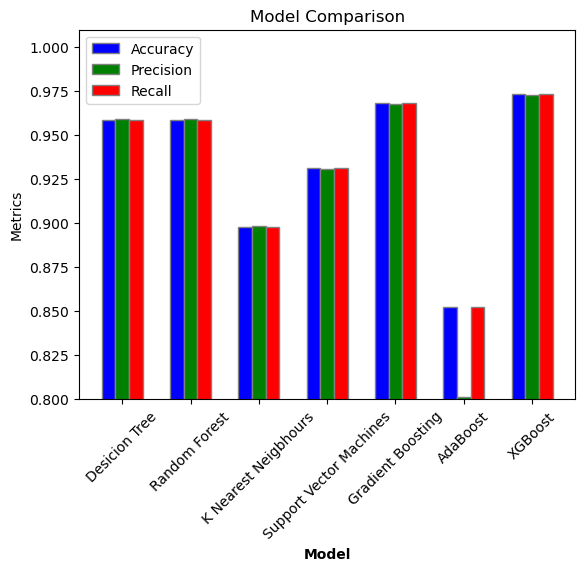

In [67]:
#ploting all the models Evaluation metrics

# Number of models
n_models = len(Model_compare['Models'])

# Setting the positions and width for the bars
bar_width = 0.2
r1 = np.arange(n_models)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.bar(r1, Model_compare['Accuracy'], color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, Model_compare['Precision'], color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, Model_compare['Recall'], color='r', width=bar_width, edgecolor='grey', label='Recall')

# Adding the xticks
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(n_models)], Model_compare['Models'])

# Adding labels and title
plt.ylabel('Metrics')
plt.title('Model Comparison')
plt.legend()
plt.xticks(rotation=45)

# Set y-axis limits
plt.ylim(0.8, 1.01)

# Show the plot
plt.show()